# Skript (V)

Eine Variante, wie Sie ein Logo einbinden können, ist, das Python-Skript direkt um die entsprechende Logik zu erweitern.

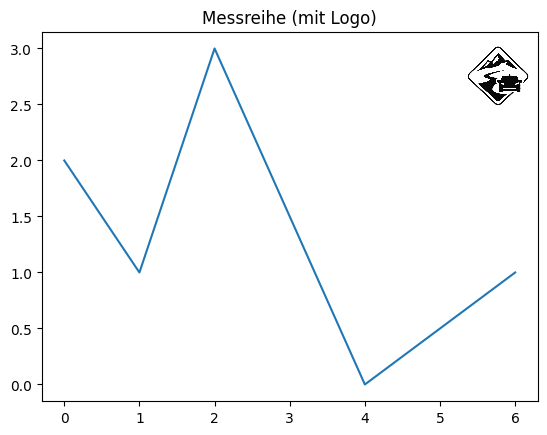

In [1]:
from io import BytesIO
from urllib.request import urlopen

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

LOGO_URL = "https://github.com/fk03ingenieursinformatik/ingenieurinformatik-buch-deploy/blob/master/img/logo-mini.png?raw=true"

fig, ax = plt.subplots()
ax.plot([0, 1, 2, 4, 6], [2, 1, 3, 0, 1])  # Grafik-Teil
ax.set_title("Messreihe (mit Logo)")

# Logo laden (aus URL) und einfügen
with urlopen(LOGO_URL, timeout=10) as response:
    data = response.read()
logo = mpimg.imread(BytesIO(data), format="png")
imagebox = OffsetImage(logo, zoom=0.07)
ab = AnnotationBbox(imagebox, (0.92, 0.88), xycoords="axes fraction", frameon=False)
ax.add_artist(ab)

plt.show()

Wenn Sie eine neue Grafik benötigen, kopieren Sie das Skript und ändern den „Grafik-Teil“ entsprechend ab.

**Problem:** Irgendwann gibt es sehr viele Kopien. Wenn sich dann z.B. das Logo (oder dessen Position/Größe) ändert, müssen Sie die Änderung an vielen Stellen nachziehen.

**Ziel:** Die Logo-Logik soll nicht in jedem Skript stehen, sondern an **einer** Stelle zentral gepflegt werden (z.B. als Wrapper oder als OO-Erweiterung).

Ein naheliegender nächster Schritt ist daher eine eigene Funktion, die das Plotten kapselt und das Logo automatisch ergänzt: eine Wrapper-Funktion.